In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = "/content/drive/MyDrive/archive/"


### Note:  Used previous MLDL Assignments project code knowledge and with the help of chatgpt wrote this code. Didn't copy from any sites.

In [ ]:
import os

data_dirs = ["/content/drive/MyDrive/archive/AiArtData/", "/content/drive/MyDrive/archive/RealArt/"]
total_count = 0

for data_dir in data_dirs:
    dir_name = os.path.basename(data_dir)
    files_count = 0
    for folder_name in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, folder_name)
        if os.path.isdir(folder_path):
            files_count += len(os.listdir(folder_path))
    print(f"Folder '{folder_name}' contains {files_count} images.")
    total_count += files_count

print(f"\nTotal number of images: {total_count}")


Folder 'AiArtData' contains 538 images.
Folder 'RealArt' contains 435 images.

Total number of images: 973


In [ ]:
import os
import cv2
from sklearn.model_selection import train_test_split
import shutil

# Specify paths for data directories
data_dir = "/content/drive/MyDrive/archive/"
train_dir = "/content/drive/MyDrive/train_data"
test_dir = "/content/drive/MyDrive/test_data"

# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Check if training and test directories already contain data
train_data_exists = len(os.listdir(train_dir)) > 0
test_data_exists = len(os.listdir(test_dir)) > 0

if not (train_data_exists and test_data_exists):
    # Lists to store file paths and corresponding labels
    file_paths = []
    labels = []

    # Traverse through the data directory
    for category in os.listdir(data_dir):
        category_path = os.path.join(data_dir, category)
        if os.path.isdir(category_path):
            for subcategory in os.listdir(category_path):
                subcategory_path = os.path.join(category_path, subcategory)
                if os.path.isdir(subcategory_path):
                    for file_name in os.listdir(subcategory_path):
                        file_paths.append(os.path.join(subcategory_path, file_name))
                        labels.append(category)

    # Splitting data into training and test sets
    train_files, test_files, train_labels, test_labels = train_test_split(file_paths, labels, test_size=0.2, random_state=42)

    # Print the number of samples in each set
    print(f"Number of training samples: {len(train_files)}")
    print(f"Number of test samples: {len(test_files)}")

    # Copying files to train directory if it's empty
    if not train_data_exists:
        for file, label in zip(train_files, train_labels):
            target_dir = os.path.join(train_dir, label)
            os.makedirs(target_dir, exist_ok=True)
            shutil.copy(file, os.path.join(target_dir, os.path.basename(file)))

    # Copying files to test directory if it's empty
    if not test_data_exists:
        for file, label in zip(test_files, test_labels):
            target_dir = os.path.join(test_dir, label)
            os.makedirs(target_dir, exist_ok=True)
            shutil.copy(file, os.path.join(target_dir, os.path.basename(file)))

    print("Data splitting complete.")
else:
    print("Training and test data already exist.")


Number of training samples: 778
Number of test samples: 195
Data splitting complete.


In [ ]:
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_dir = "/content/drive/MyDrive/train_data"
test_data_dir = "/content/drive/MyDrive/test_data"
batch_size = 20

# Data augmentation and normalization for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # normalize pixel values to [0,1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Normalization for test data (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(256, 256),  # Variable input shape
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',  # Set color mode to RGB
    interpolation='nearest',  # Use nearest neighbor interpolation for resizing
    follow_links=True  # Follow symbolic links when traversing directories
)

# Flow test images in batches using test_datagen generator
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(256, 256),  # Variable input shape
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',  # Set color mode to RGB
    interpolation='nearest',  # Use nearest neighbor interpolation for resizing
    follow_links=True,  # Follow symbolic links when traversing directories
    shuffle=False
)


Found 773 images belonging to 2 classes.
Found 195 images belonging to 2 classes.


Original Images:


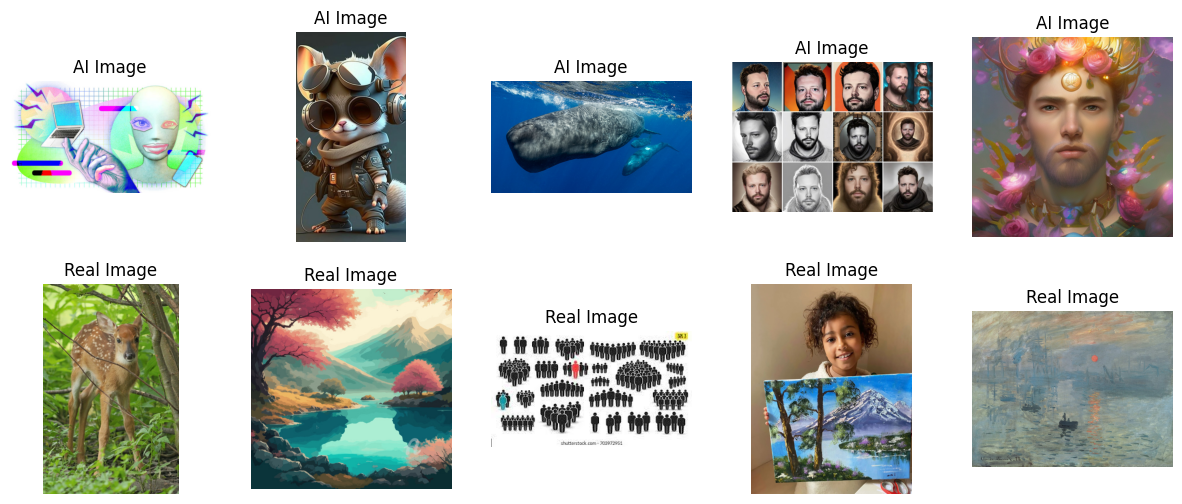

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

ai_images_dir= "/content/drive/MyDrive/train_data/AiArtData"
real_images_dir= "/content/drive/MyDrive/train_data/RealArt"



# Function to load and plot images
def plot_images(directory_ai, directory_real, num_images=5):
    print("Original Images:")
    fig, axes = plt.subplots(2, num_images, figsize=(15, 6))  # Create subplots
    # Plot original AI images
    for i, image_file in enumerate(os.listdir(directory_ai)[:num_images]):
        image_path = os.path.join(directory_ai, image_file)
        image = cv2.imread(image_path)
        axes[0, i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[0, i].axis('off')  # Hide axis
        axes[0, i].set_title('AI Image')
    # Plot original Real images
    for i, image_file in enumerate(os.listdir(directory_real)[:num_images]):
        image_path = os.path.join(directory_real, image_file)
        image = cv2.imread(image_path)
        axes[1, i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[1, i].axis('off')  # Hide axis
        axes[1, i].set_title('Real Image')
    plt.show()

# Plot original images
plot_images(ai_images_dir, real_images_dir)

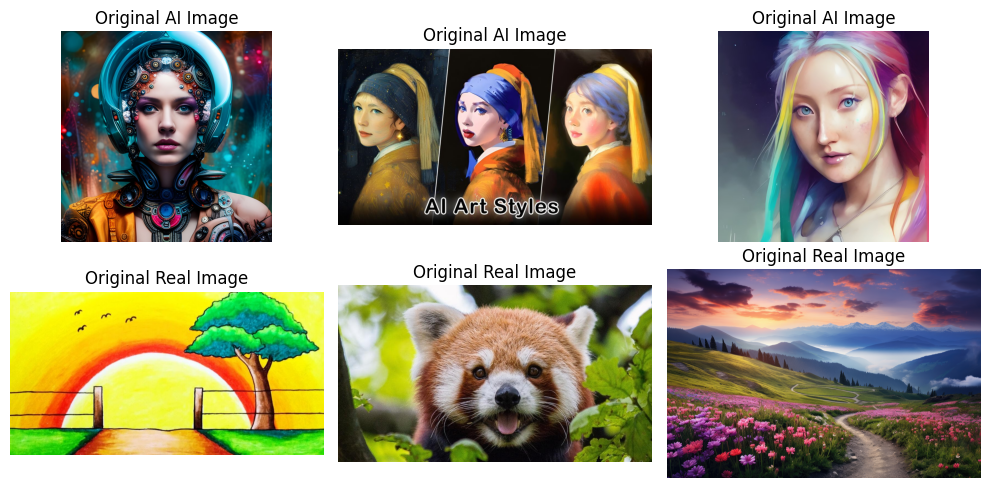

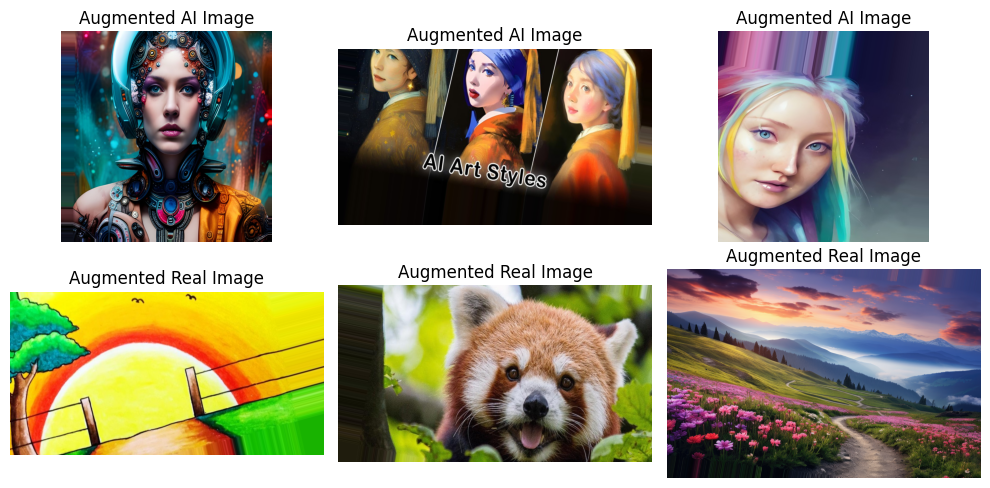

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
from random import randint
from keras.preprocessing.image import ImageDataGenerator

# Function to read images from a directory
def read_images_from_dir(directory):
    images = []
    for filename in os.listdir(directory):
        img = cv2.imread(os.path.join(directory, filename))
        if img is not None:
            images.append(img)
    return images

# Function to plot images
def plot_images(images, titles, rows=1, cols=2):
    fig, axes = plt.subplots(rows, cols, figsize=(10, 5))
    for i, ax in enumerate(axes.flat):
        ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        ax.set_title(titles[i])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Data augmentation parameters
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Paths to your data directories
ai_data_dir = "/content/drive/MyDrive/train_data/AiArtData"
real_data_dir = "/content/drive/MyDrive/train_data/RealArt"

# Read images from directories
ai_images = read_images_from_dir(ai_data_dir)
real_images = read_images_from_dir(real_data_dir)

# Randomly select some images to plot
num_images_to_plot = 3
ai_indices = [randint(0, len(ai_images) - 1) for _ in range(num_images_to_plot)]
real_indices = [randint(0, len(real_images) - 1) for _ in range(num_images_to_plot)]

# Plot original images
plot_images([ai_images[i] for i in ai_indices] + [real_images[i] for i in real_indices],
            ['Original AI Image' for _ in ai_indices] + ['Original Real Image' for _ in real_indices],
            rows=2, cols=num_images_to_plot)

# Apply data augmentation
ai_augmented_images = []
real_augmented_images = []

for i in range(num_images_to_plot):
    ai_img = ai_images[ai_indices[i]]
    real_img = real_images[real_indices[i]]

    # Reshape image to fit datagen requirements (1 sample, height, width, channels)
    ai_img = ai_img.reshape((1,) + ai_img.shape)
    real_img = real_img.reshape((1,) + real_img.shape)

    ai_augmented_images.extend(datagen.flow(ai_img, batch_size=1).next())
    real_augmented_images.extend(datagen.flow(real_img, batch_size=1).next())

# Plot augmented images
plot_images(ai_augmented_images + real_augmented_images,
            ['Augmented AI Image' for _ in range(num_images_to_plot)] + ['Augmented Real Image' for _ in range(num_images_to_plot)],
            rows=2, cols=num_images_to_plot)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

num_classes = 2
input_shape = (256, 256, 3)

from tensorflow.keras import models, layers

def create_model():
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))


    # Flatten the output
    model.add(layers.Flatten())

    # Dense layers with dropout
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))

    # Output layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model


# Create the model
model = create_model()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Define paths for saving model checkpoints
checkpoint_path = "model_checkpoint_FP_MLDL.keras"

# Define checkpoint callback
checkpoint = ModelCheckpoint(checkpoint_path,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')

# Train the model with the checkpoint callback
history = model.fit(train_generator,
                    epochs=30,
                    validation_data=test_generator,
                    callbacks=[checkpoint])

# Load the best model from checkpoints
model.load_weights(checkpoint_path)


Epoch 1/30
39/39 [==============================] - ETA: 0s - loss: 1.2078 - accuracy: 0.5395
Epoch 1: val_accuracy improved from -inf to 0.56923, saving model to model_checkpoint_FP_MLDL.keras
39/39 [==============================] - 45s 1s/step - loss: 1.2078 - accuracy: 0.5395 - val_loss: 0.7034 - val_accuracy: 0.5692
Epoch 2/30
39/39 [==============================] - ETA: 0s - loss: 1.0687 - accuracy: 0.5718
Epoch 2: val_accuracy did not improve from 0.56923
39/39 [==============================] - 40s 1s/step - loss: 1.0687 - accuracy: 0.5718 - val_loss: 2.0341 - val_accuracy: 0.4410
Epoch 3/30
39/39 [==============================] - ETA: 0s - loss: 0.9732 - accuracy: 0.5627
Epoch 3: val_accuracy did not improve from 0.56923
39/39 [==============================] - 43s 1s/step - loss: 0.9732 - accuracy: 0.5627 - val_loss: 1.8165 - val_accuracy: 0.4410
Epoch 4/30
39/39 [==============================] - ETA: 0s - loss: 0.9455 - accuracy: 0.5589
Epoch 4: val_accuracy did not impro

In [ ]:
# Model evaluation
# Calculate the final accuracy
final_accuracy = model.evaluate(test_generator)[1]
print("Final Accuracy:", final_accuracy)

# Save the trained model
model.save("trained_model.h5")


10/10 [==============================] - 7s 643ms/step - loss: 0.5538 - accuracy: 0.7846
Final Accuracy: 0.7846153974533081


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Confusion Matrix and Classification Report:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Generate confusion matrix
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_true, y_pred)
print("Classification Report:")
print(class_report)


10/10 [==============================] - 6s 590ms/step
Confusion Matrix:
[[90 19]
 [23 63]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       109
           1       0.77      0.73      0.75        86

    accuracy                           0.78       195
   macro avg       0.78      0.78      0.78       195
weighted avg       0.78      0.78      0.78       195



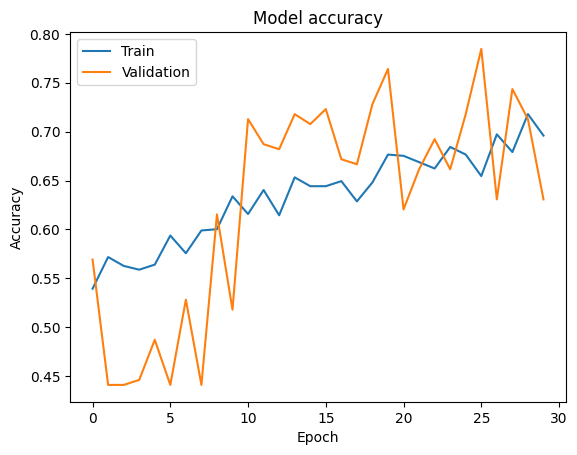

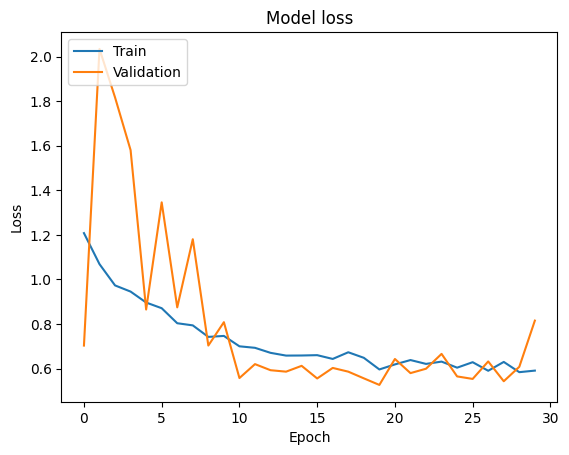

In [ ]:
#Loss and Accuracy Plotting:
import matplotlib.pyplot as plt

# Plot loss and accuracy curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
